# South Korea COVID19 Analysis

## Preliminary Wrangling

> The dataset is available on kaggle: [Source](https://www.kaggle.com/kimjihoo/coronavirusdataset)
> The dataset contains four main data segments:
- **Case data**:
    - Case: information about COVID19 infenction cases
- **Patient data**:
    - PatientInfo: Epidemiological data of COVID19 
    - PatientRoute: Route data of COVID19 
- **Time series data**:
    - Time: Time series data of COVID19 status
    - TimeAge: Time series data of COVID19 status in terms of the age
    - TimeGender: Time series data of COVID19 status in terms of the gender
    - TimeProvince: Time serie data of COVID19 status in terms of the province
- **Additional data**:
    - Region: Location and statistical data of the regions in South Korea
    - Weather: Weather data
    - SearchTrend: Trend data of the keywords searched in NAVER - one of the largest portals in South Korea
    - SeoulFloating: Floating population in Seoul
    - Policy: Data of the government policy for COVID19
    

In [11]:
import sys
!{sys.executable} -m pip install geopandas

In [12]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import geopandas


%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [36]:
case_df = pd.read_csv('Data/Case.csv')
patientinfo_df = pd.read_csv('Data/PatientInfo.csv')
patientroute_df = pd.read_csv('Data/PatientRoute.csv')
time_df = pd.read_csv('Data/time.csv')
timeage_df = pd.read_csv('Data/TimeAge.csv')
timegender_df = pd.read_csv('Data/TimeGender.csv')
timeprovince_df = pd.read_csv('Data/TimeProvince.csv')
region_df = pd.read_csv('Data/Region.csv')
weather_df = pd.read_csv('Data/Weather.csv')
searchtrend_df = pd.read_csv('Data/SearchTrend.csv')
policy_df = pd.read_csv('Data/Policy.csv')
names = ['case', 'patientinfo', 'patientroute', 'time', 'timeage', 'timegender','timeprovince',
        'region', 'weather', 'searchtrend', 'policy']
dataframes = [case_df, patientinfo_df, patientroute_df, time_df, timeage_df, timegender_df, timeprovince_df,
      region_df, weather_df, searchtrend_df, policy_df]
data = dict(zip(names, dataframes))

In [20]:
print(case_df.shape[0])
case_df.head(1)

128


,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Yongsan-gu,True,Itaewon Clubs,133.0,37.538621,126.992652


In [21]:
print(patientinfo_df.shape[0])
patientinfo_df.head(1)

4004


,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released


In [22]:
print(patientroute_df.shape[0])
patientroute_df.head(1)

8092


,patient_id,global_num,date,province,city,type,latitude,longitude
0,1000000001,2.0,2020-01-22,Gyeonggi-do,Gimpo-si,airport,37.615246,126.715632


In [32]:
policy_df

,policy_id,country,type,gov_policy,detail,start_date,end_date
0,1,Korea,Alert,Infectious Disease Alert Level,Level 1 (Blue),2020-01-03,2020-01-19
1,2,Korea,Alert,Infectious Disease Alert Level,Level 2 (Yellow),2020-01-20,2020-01-27
2,3,Korea,Alert,Infectious Disease Alert Level,Level 3 (Orange),2020-01-28,2020-02-22
3,4,Korea,Alert,Infectious Disease Alert Level,Level 4 (Red),2020-02-23,NaN
4,5,Korea,Immigration,Special Immigration Procedure,from China,2020-02-04,NaN
5,6,Korea,Immigration,Special Immigration Procedure,from Hong Kong,2020-02-12,NaN
6,7,Korea,Immigration,Special Immigration Procedure,from Macau,2020-02-12,NaN
7,8,Korea,Immigration,Special Immigration Procedure,from Japan,2020-03-09,NaN
8,9,Korea,Immigration,Special Immigration Procedure,from Italy,2020-03-12,NaN
9,10,Korea,Immigration,Special Immigration Procedure,from Iran,2020-03-12,NaN


In [47]:
for key,val in data.items():
    print(key +":")
    print(data[key].isnull().sum())
    print("duplicates:",data[key].duplicated().sum())
    print(data[key].dtypes)
    print("---")

case:
case_id           0
province          0
city              0
group             0
infection_case    0
confirmed         3
latitude          0
longitude         0
dtype: int64
duplicates: 0
case_id             int64
province           object
city               object
group                bool
infection_case     object
confirmed         float64
latitude           object
longitude          object
dtype: object
---
patientinfo:
patient_id               0
global_num            1198
sex                    330
birth_year             737
age                    479
country                  0
province                 0
city                    78
disease               3986
infection_case         793
infection_order       3973
infected_by           3105
contact_number        3324
symptom_onset_date    3469
confirmed_date           3
released_date         2496
deceased_date         3939
state                    0
dtype: int64
duplicates: 0
patient_id              int64
global_num            flo

### What is the structure of your dataset?

> <img src="Data/DatasetStructure.png">

### What is/are the main feature(s) of interest in your dataset?

> Infected patient's main features and geodata and weather's impact on the infection spread. The dataset also provides search data what might help to understand people's reactions and feelings.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Latitude and longitude will allow maps visualizations, weather file will deliver enough information to compare changes in weather with number of new patients. SearchTrend data allows more insight on people's moods. PatientInfo and PatientRoute datasets help distinguish the common people characteristics.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [192]:
base_color = sb.color_palette()[0]

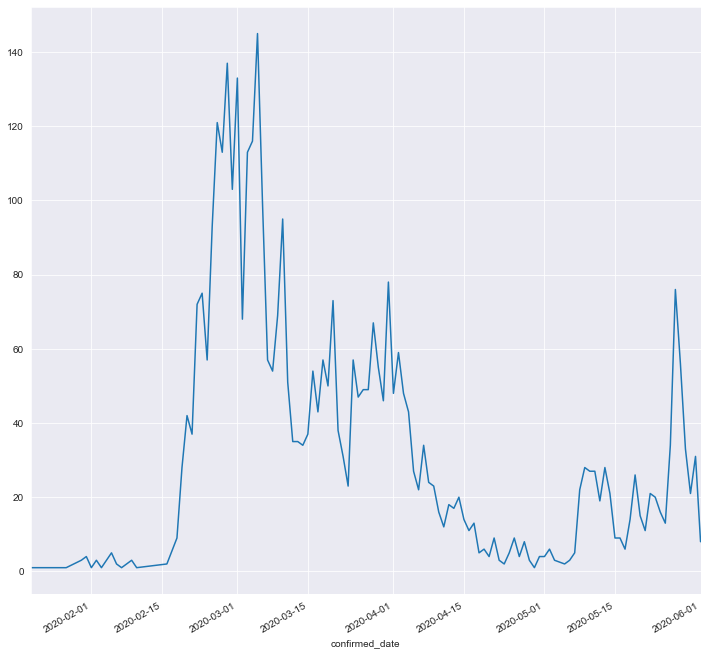

In [179]:
plt.figure(figsize=(12,12))
daily_count = patientinfo_df.groupby('confirmed_date').patient_id.count()
daily_count.plot()

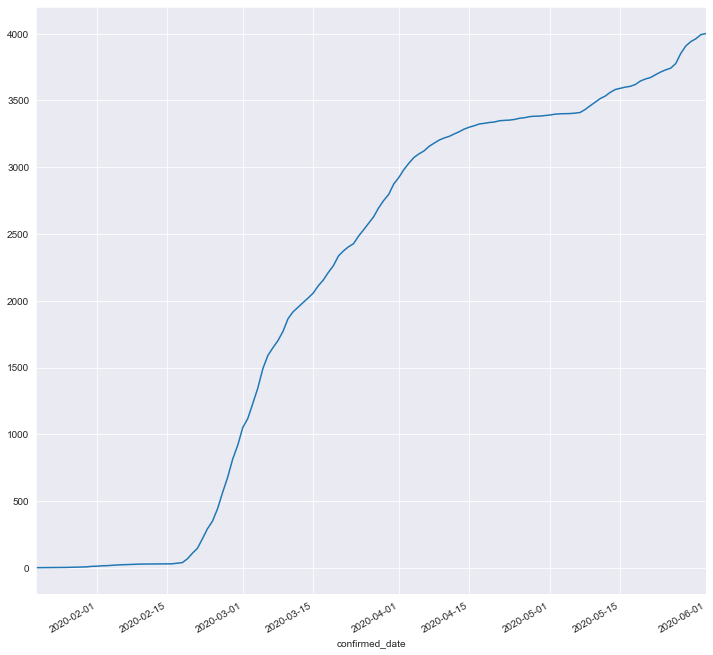

In [180]:
plt.figure(figsize=(12,12))
accumulated_count = daily_count.cumsum()
accumulated_count.sort_values().plot()

In [252]:
age = patientinfo_df['age'].value_counts()
sex = patientinfo_df['sex'].value_counts()
infection_case = patientinfo_df['infection_case'].value_counts()
infection_case = infection_case[infection_case>50]

contact with patient        1182
overseas inflow              703
etc                          601
Itaewon Clubs                156
Guro-gu Call Center          112
Shincheonji Church           107
Coupang Logistics Center      70
Name: infection_case, dtype: int64

In [ ]:
sb.countplot(data=patientinfo_df, x='age', color=base_color);

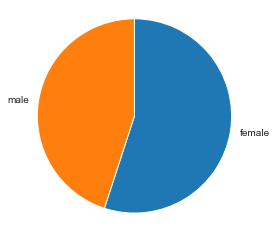

In [232]:
plt.pie(sex, labels=sex.index, startangle=90, counterclock=False)
plt.axis('square');

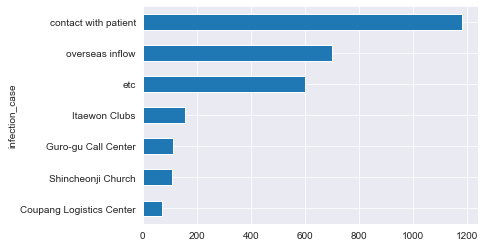

In [301]:
common_cases=patientinfo_df.groupby('infection_case') \
    .filter(lambda x: len(x)>50)['infection_case'].unique()

patientinfo_df[patientinfo_df['infection_case'].isin(common_cases)] \
    .groupby('infection_case') \
    .count()['patient_id'] \
    .sort_values() \
    .plot(kind='barh', color=base_color);

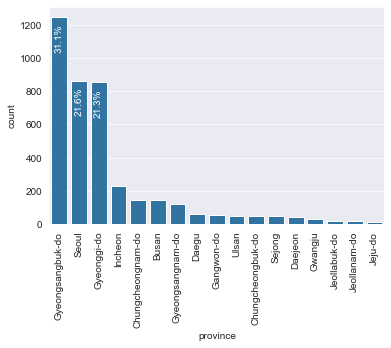

In [211]:
sb.countplot(data=patientinfo_df, x='province', color=base_color, order=patientinfo_df['province'].value_counts().index)
plt.xticks(rotation=90);
n_points = patientinfo_df.shape[0]
cat_counts = patientinfo_df['province'].value_counts()
locs, labels = plt.xticks()
for loc, label in zip(locs, labels):
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    if(100*count/n_points > 10):
        plt.text(loc,count-200, pct_string, ha='center',color='w', rotation=90)

In [310]:
time_df.set_index('date', inplace=True)

In [337]:
time_df.index = pd.to_datetime(time_df.index)

In [367]:
time_df.sort_values('test', ascending=False).head(1)

,time,test,negative,confirmed,released,deceased
date,,,,,,
2020-05-31,0,910822,876060,11468,10405,270


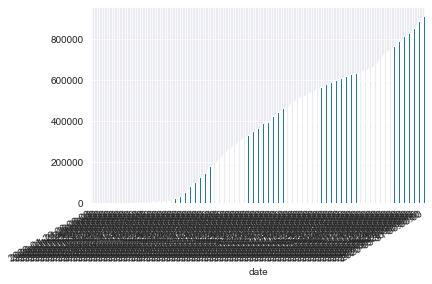

In [347]:
# import matplotlib.ticker as ticker
# time_df['test'].plot(kind='bar')
# ticklabels=['']*len(time_df.index)
# ticklabels[::100] = [item.strftime('%b %d') for item in time_df.index[::100]]
# ticklabels[::100] = [item.strftime('%b %d\n%Y') for item in time_df.index[::100]]
# ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
# plt.gcf().autofmt_xdate()
# plt.show()

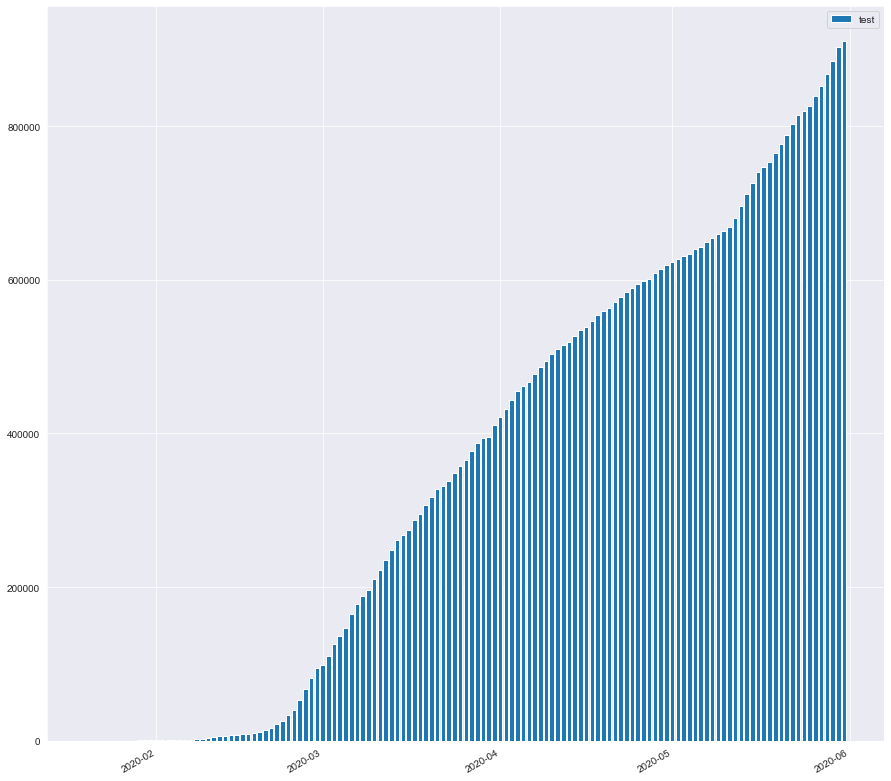

In [392]:
def format_date(ax):
    days = mdates.DayLocator()
    months = mdates.MonthLocator()  # every month
    dayFmt = mdates.DateFormatter('%D')
    monthFmt = mdates.DateFormatter('%Y-%m')
    ax.figure.autofmt_xdate()
    ax.xaxis.set_major_locator(months) 
    ax.xaxis.set_major_formatter(monthFmt)
    ax.xaxis.set_minor_locator(days)
    
def stack_bar(df, ax, **kwargs):
    P = []
    lastBar = None

    for col in df.columns:
        X = df.index
        Y = df[col]
        if lastBar is not None:
            P.append(ax.bar(X, Y, bottom=lastBar, **kwargs))
        else:
            P.append(ax.bar(X, Y, **kwargs))
        lastBar = Y
    plt.legend([p[0] for p in P], df.columns)
    
fig, ax = plt.subplots(1, figsize=(15,15))
stack_bar(time_df[['test']],ax)
format_date(ax)
plt.show()

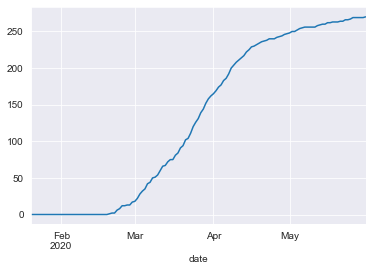

In [391]:
time_df['deceased'].plot();

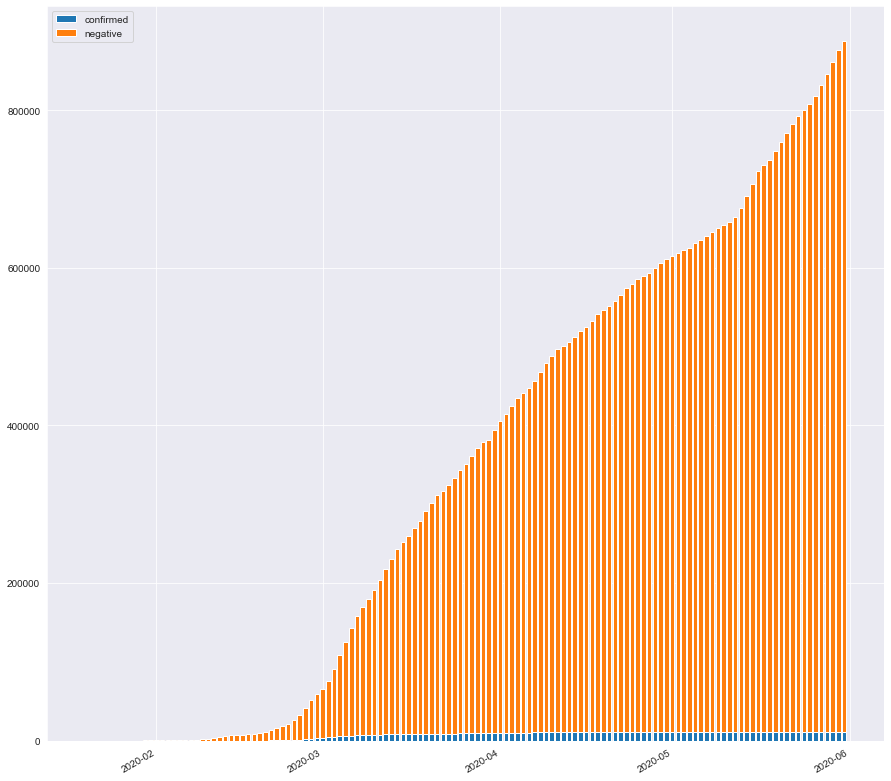

In [393]:
fig, ax = plt.subplots(1, figsize=(15,15))
stack_bar(time_df[['confirmed', 'negative']],ax)
format_date(ax)
plt.show()

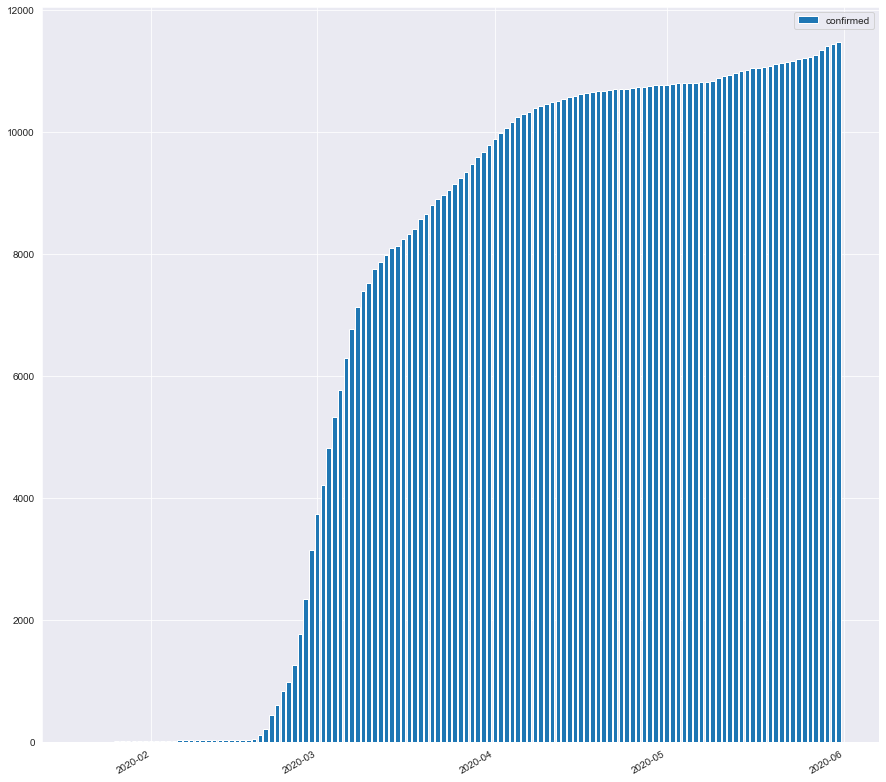

In [369]:
fig, ax = plt.subplots(1, figsize=(15,15))
stack_bar(time_df[['confirmed']],ax)
format_date(ax)
plt.show()

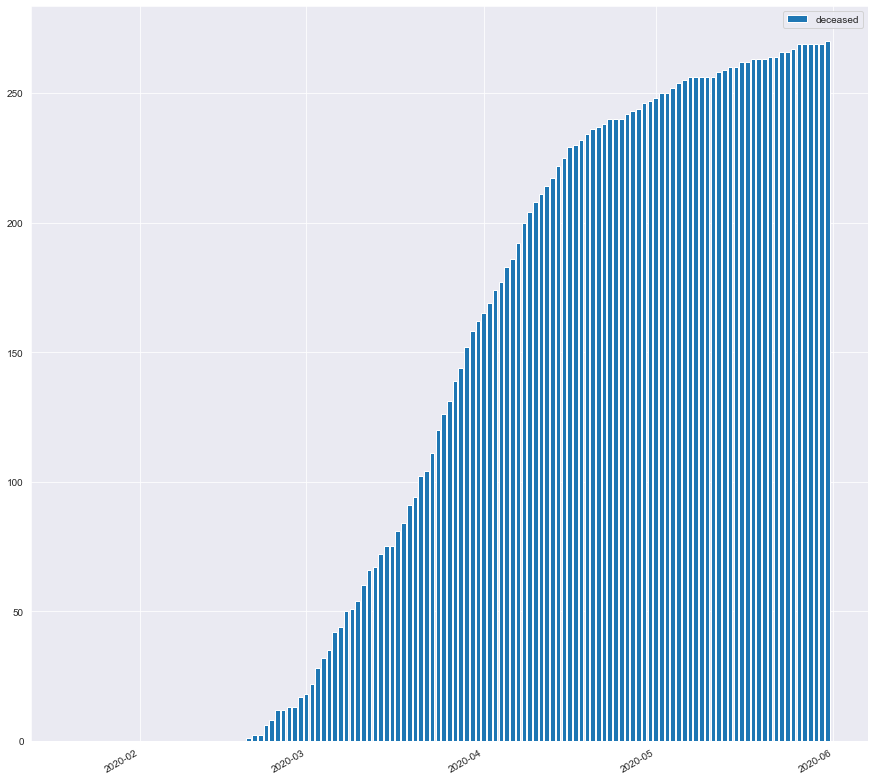

In [371]:
fig, ax = plt.subplots(1, figsize=(15,15))
stack_bar(time_df[['deceased']],ax)
format_date(ax)
plt.show()

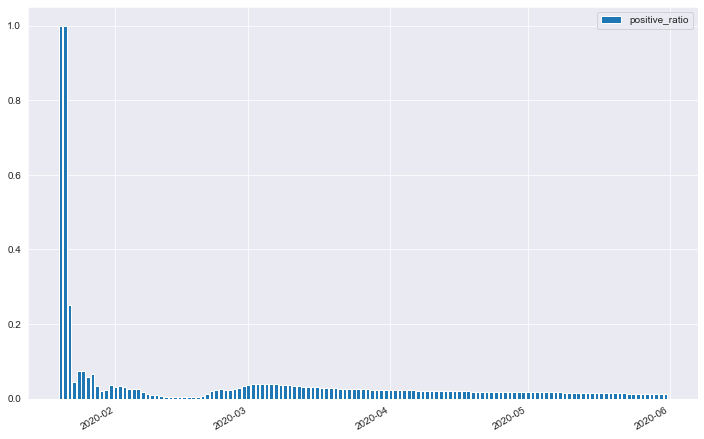

In [373]:
time_df['positive_ratio'] = time_df['confirmed']/time_df['test']
fig, ax = plt.subplots(1, figsize=(12,8))
stack_bar(time_df[['positive_ratio']],ax)
format_date(ax)
plt.show()

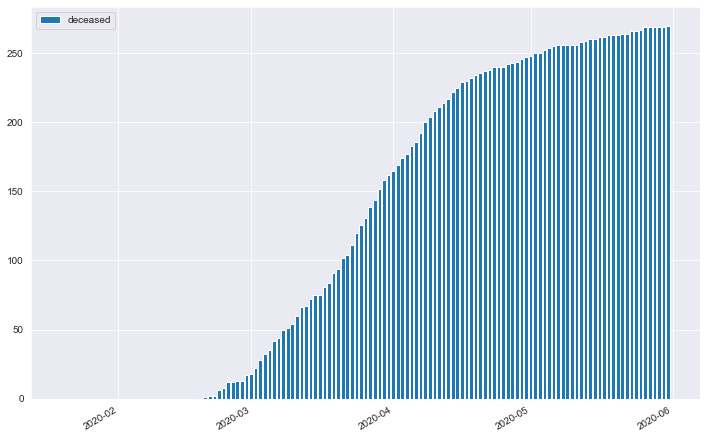

In [378]:
time_df['positive_ratio'] = time_df['confirmed']/time_df['test']
fig, ax = plt.subplots(1, figsize=(12,8))
stack_bar(time_df[['deceased']],ax)
format_date(ax)
plt.show()

In [396]:
timeage_df.set_index('date', inplace=True)
timeage_df.index = pd.to_datetime(timeage_df.index)

In [399]:
timeage_df.scatter_plot()

AttributeError: 'DataFrame' object has no attribute 'scatter_plot'

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!